# CAPSTONE PROJECT --- Best place to Open a gym

In [1]:
# first we have to import all the main libraries which will be used in this project.

import pandas as pd
import numpy as np

pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)

import json # library to handle json file

import requests # library to handle requests

# !pip install folium
import folium # for making graphs

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from geopy.geocoders import Nominatim

from sklearn.cluster import KMeans # for making clusters of the parameter


print("libraries successfully imported")

libraries successfully imported


In [2]:
import geocoder

## Now, we want to get data for delhi's neighborhood. For this we will read a csv file

In [3]:
# this file is get from the kaggle app

delhi_df = pd.read_csv(r'C:\Users\apurv\Desktop\delhi_dataSet.csv')
delhi_df.head()

,Unnamed: 0,Borough,Neighborhood,latitude,longitude
0,0,North West Delhi,Adarsh Nagar,28.614192,77.071541
1,1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,2,North West Delhi,Azadpur,28.707657,77.175547
3,3,North West Delhi,Bawana,28.799660,77.032885
4,4,North West Delhi,Begum Pur,NaN,NaN


In [4]:
delhi_df.shape

(185, 5)

In [5]:
# now we clean the datframe for analyze further

# removing the UNnamed column

delhi_df.drop("Unnamed: 0" , axis =1 ,inplace = True)


In [6]:
delhi_df.head()

,Borough,Neighborhood,latitude,longitude
0,North West Delhi,Adarsh Nagar,28.614192,77.071541
1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,North West Delhi,Azadpur,28.707657,77.175547
3,North West Delhi,Bawana,28.799660,77.032885
4,North West Delhi,Begum Pur,NaN,NaN


In [7]:
# if there is a empty value in BOROUGH  and neighbourhood , then removing that row.

# first, replacing empty value in column =Borough and Neighbourhood  to numpy nan value

delhi_df['Borough'].replace('' ,np.nan ,inplace = True)
delhi_df['Neighborhood'].replace('' ,np.nan ,inplace = True)



In [8]:
# getting the names of BOrough and Neighborhood who has Nan value

delhi_df.loc[(delhi_df['Borough'] == 'NaN') | (delhi_df['Neighborhood'] == 'NaN')]

,Borough,Neighborhood,latitude,longitude


In [9]:
# as, there is no empty or nan value in these 2 columns after removing them, there is no change in our dataset.

delhi_df.dropna(subset =['Borough' , 'Neighborhood'] , inplace =True)

### note  - we are not removing Nan values in Coordination 's column as we will replace them with actual coordiantes later

In [10]:
delhi_df.head()

,Borough,Neighborhood,latitude,longitude
0,North West Delhi,Adarsh Nagar,28.614192,77.071541
1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,North West Delhi,Azadpur,28.707657,77.175547
3,North West Delhi,Bawana,28.799660,77.032885
4,North West Delhi,Begum Pur,NaN,NaN


In [11]:
delhi_df.shape

(185, 4)

In [12]:
# As, we get data seet from outside, we surely don't know that the coordiantes given are right and also for some places coordiantes are not given

# So, we will use geocoder to get coordiantes of all neighbourhood again and then checking them to already present coordiantes.

In [13]:
from IPython.display import clear_output, display



geo_delhi_codes = pd.DataFrame(columns = list(delhi_df.columns) + ['Latitude_1', 'Longitude_2'])
geo_delhi_codes.head()


,Borough,Neighborhood,latitude,longitude,Latitude_1,Longitude_2


In [14]:
nominatim = Nominatim(user_agent="my-application2")

from time import sleep
from geopy.exc import GeocoderTimedOut
def nominatim_geocode(address):
    try:
        return nominatim.geocode(query=address)
    except GeocoderTimedOut:
        print('.')
        sleep(1)
        return nominatim_geocode(address)

In [15]:


for index, row in delhi_df.iterrows():
    clear_output(wait=True)
    display(str(index) + ' of ' + str(len(delhi_df)))
#     address = str(row['Borough']) + ', Toronto, Canada'
    address =  str(row['Neighborhood']) + ' ' + str(row['Borough']) , 'India'
    print(address)
    g = nominatim_geocode(address)
    if g == None:
        continue
    print(g.latitude,', ',g.longitude)
    
    #fill the dataframe
    geo_delhi_codes = geo_delhi_codes.append({
                                                'Borough': row.Borough,
                                                'Neighborhood': row.Neighborhood,
                                                'Latitude': row.latitude,
                                                'Longitude': row.longitude,
                                                'Latitude_1': g.latitude,
                                                'Longitude_2': g.longitude}, ignore_index=True)
    
    #sleep for not saturate the geocoding server
    sleep(1)

'184 of 185'

('Vikaspuri West Delhi', 'India')
28.638419050000003 ,  77.07083614685489


In [16]:
geo_delhi_codes.head()

,Borough,Neighborhood,latitude,longitude,Latitude_1,Longitude_2,Latitude,Longitude
0,North West Delhi,Adarsh Nagar,NaN,NaN,28.614193,77.071541,28.614192,77.071541
1,North West Delhi,Ashok Vihar,NaN,NaN,28.699453,77.184826,28.699453,77.184826
2,North West Delhi,Azadpur,NaN,NaN,28.707657,77.175547,28.707657,77.175547
3,North West Delhi,Bawana,NaN,NaN,28.799660,77.032885,28.799660,77.032885
4,North West Delhi,Begum Pur,NaN,NaN,28.725503,77.058371,NaN,NaN


In [17]:
delhi_coor = geo_delhi_codes.drop(["latitude" , "longitude"] , axis =1)

In [18]:
delhi_coor

,Borough,Neighborhood,Latitude_1,Longitude_2,Latitude,Longitude
0,North West Delhi,Adarsh Nagar,28.614193,77.071541,28.614192,77.071541
1,North West Delhi,Ashok Vihar,28.699453,77.184826,28.699453,77.184826
2,North West Delhi,Azadpur,28.707657,77.175547,28.707657,77.175547
3,North West Delhi,Bawana,28.799660,77.032885,28.799660,77.032885
4,North West Delhi,Begum Pur,28.725503,77.058371,NaN,NaN
5,North West Delhi,Dhaka,28.708698,77.205749,39.031714,-90.261223
6,North West Delhi,Jahangirpuri,28.725972,77.162658,28.725972,77.162658
7,North West Delhi,Karala,28.735140,77.032511,28.735140,77.032511
8,North West Delhi,Keshav Puram,28.688926,77.161683,28.688926,77.161683
9,North West Delhi,Kingsway Camp,28.613749,77.212133,28.614262,77.201555


###  Note --- The coordiantes of places which we can't get from the geocoder , it removed from the datafram

In [19]:
delhi_coor.shape

(171, 6)

In [20]:
# now, we see that for some addresses , previous coordiantate's data are wrong.
#SO, we will take only coordiantes we get from the geocoder to get only accurate values for our project

In [21]:
delhi_new = delhi_coor.drop(["Latitude" ,"Longitude"] ,axis = 1)

In [35]:
delhi_new.head()

,Borough,Neighborhood,latitude,longitude
0,North West Delhi,Adarsh Nagar,28.614193,77.071541
1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,North West Delhi,Azadpur,28.707657,77.175547
3,North West Delhi,Bawana,28.799660,77.032885
4,North West Delhi,Begum Pur,28.725503,77.058371


In [36]:
delhi_new.shape

(171, 4)

In [37]:
# we will save this dataframe if there is more uses in other projects or for other thing in our computer

delhi_new.to_csv('delhi_mydata2.csv')

In [38]:
# rename the columns

delhi_new = delhi_new.rename(columns ={'Latitude_1':'latitude', 'Longitude_2':'longitude'})

In [39]:
delhi_new.head()

,Borough,Neighborhood,latitude,longitude
0,North West Delhi,Adarsh Nagar,28.614193,77.071541
1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,North West Delhi,Azadpur,28.707657,77.175547
3,North West Delhi,Bawana,28.799660,77.032885
4,North West Delhi,Begum Pur,28.725503,77.058371


In [27]:
#As, let the investors has already a gym in borough -- south delhi , south west delhi   . And they didn't want to open ther a new

# so, we will remove all rows which have Borough these values.

In [40]:
delhi_new = delhi_new.loc[(delhi_new["Borough"]!= "South Delhi") & (delhi_new["Borough"]!= "South West Delhi"),:].reset_index()

In [41]:
delhi_new = delhi_new.drop("index" ,axis =1)

In [42]:
delhi_new.head()

,Borough,Neighborhood,latitude,longitude
0,North West Delhi,Adarsh Nagar,28.614193,77.071541
1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,North West Delhi,Azadpur,28.707657,77.175547
3,North West Delhi,Bawana,28.799660,77.032885
4,North West Delhi,Begum Pur,28.725503,77.058371


In [44]:
delhi_new.shape

(107, 4)

## Now, we will vizulaize the neighbours in delhi by map

In [46]:
delhi_latitude = 28.644800
delhi_longitude = 77.216721

delhi_map  = folium.Map(location = [ delhi_latitude ,  delhi_longitude] ,zoom_start = 10)

for lat ,lng , label in zip(delhi_new["latitude"] ,delhi_new["longitude"] , delhi_new["Neighborhood"]):
    label = folium.Popup(label ,parse_html = True)
    folium.CircleMarker([lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(delhi_map)
    
delhi_map
    
    

In [62]:
# Now lets see for each Borough how many neighbours it contain

delhi_bor_vs_neigh = delhi_new.groupby(by = "Borough")['Neighborhood'].count()
delhi_bor_vs_neigh

Borough
Central Delhi        7
East Delhi          18
New Delhi           10
North Delhi         25
North East Delhi    11
North West Delhi    17
West Delhi          19
Name: Neighborhood, dtype: int64

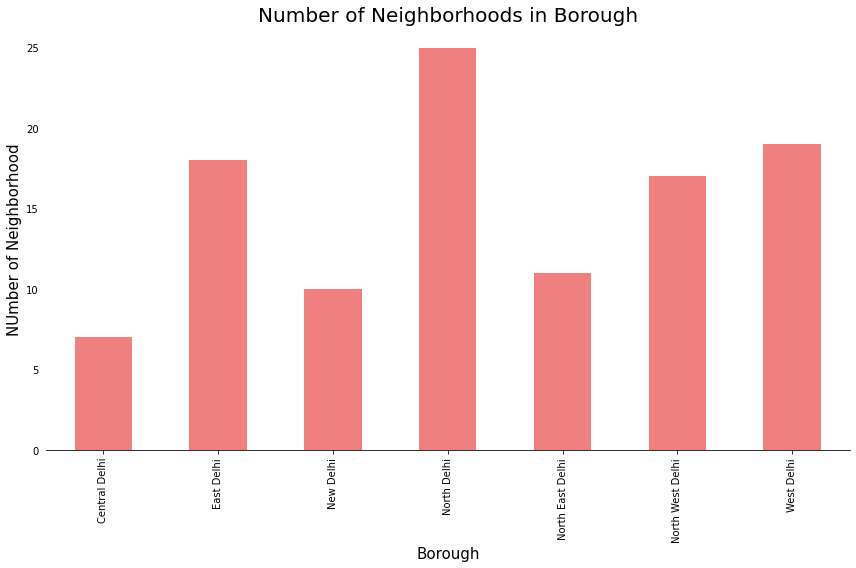

In [67]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))

ax = delhi_bor_vs_neigh.plot(kind='bar', color='lightcoral')
ax.set_title('Number of Neighborhoods in Borough', fontsize=20)
ax.set_xlabel('Borough', fontsize=15)
ax.set_ylabel('NUmber of Neighborhood', fontsize=15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(which='major', left=False)

fig.tight_layout()


## Now, we will explore the venues for each neighborhood by using FOURSQUARE API

In [68]:
# Foursquare Credentils

CLIENT_ID = 'TF4LSE4WZOM5VDSRAJCBBKJBM0U1VKRJTYX5IAHZPJZM5DY1' # your Foursquare ID
CLIENT_SECRET = 'TGOVCHGNLBKUTVATL0F5LY5QJQBW3JHEKISRL3FEGZSAGXDR' # your Foursquare Secret
VERSION = '20200210' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TF4LSE4WZOM5VDSRAJCBBKJBM0U1VKRJTYX5IAHZPJZM5DY1
CLIENT_SECRET:TGOVCHGNLBKUTVATL0F5LY5QJQBW3JHEKISRL3FEGZSAGXDR


### Lets Explore the first neighborhood in 0ur data

In [69]:
delhi_new.loc[0,:]

Borough         North West Delhi
Neighborhood        Adarsh Nagar
latitude                 28.6142
longitude                77.0715
Name: 0, dtype: object

In [70]:
# lets get latitude , longitude of neighbour

neighborhood_latitude = delhi_new.loc[0,'latitude']
neighborhood_longitude = delhi_new.loc[0,'longitude']

neighborhood_name = delhi_new.loc[0,'Neighborhood']

print(f"The latitude and  longitude of {neighborhood_name} is {neighborhood_latitude} , {neighborhood_longitude}" )

The latitude and  longitude of Adarsh Nagar is 28.6141925 , 77.0715411848447


In [75]:
# making url for using FOURSQUARE API

radius = 1000 # we will explore 5all venues till 500 metere in range
LIMIT = 100

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [76]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6024e8398a76ec393f6d86fa'},
 'response': {'headerLocation': 'West Delhi',
  'headerFullLocation': 'West Delhi, Delhi',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 28.62319250900001,
    'lng': 77.0817742062798},
   'sw': {'lat': 28.605192490999993, 'lng': 77.0613081634096}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e664a628877954de9d0030d',
       'name': 'Bikanerwala',
       'location': {'lat': 28.61339089253902,
        'lng': 77.07608403328531,
        'labeledLatLngs': [{'label': 'display',
          'lat': 28.61339089253902,
          'lng': 77.07608403328531}],
        'distance': 452,
        'cc': 'IN',
        'country': 'India',
        'formattedAddress': 

In [77]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

## Now we are ready to clean the json and structure it into a pandas dataframe.

In [78]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
# nearby_venues.head()
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
# nearby_venues.head()
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-78-41ba94c4321c>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Bikanerwala,Indian Restaurant,28.613391,77.076084
1,Uttam nagar,Metro Station,28.620201,77.068709
2,Gold's Gym A Block Janakpuri,Gym,28.622439,77.069348
3,Potholes at Dabri,Pool,28.605309,77.072504


### Lets, create a function to get all venues from all neighborhoods

In [84]:
def getNearbyVenues(names , latitude , longitude,radius = 1000):
    
    venues_list = []
    for name ,lat,lng in zip(names ,latitude ,longitude):
        print(name)
        
        url ='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results
        ])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list] )
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### code for implementing above function

In [85]:
delhi_venues = getNearbyVenues(names=delhi_new['Neighborhood'],
                                   latitude=delhi_new['latitude'],
                                   longitude=delhi_new['longitude'],
                               radius = 1000
)

Adarsh Nagar
Ashok Vihar
Azadpur
Bawana
Begum Pur
Dhaka
Jahangirpuri
Karala
Keshav Puram
Kingsway Camp
Kohat Enclave
Model Town
Narela
Pitam Pura
Rani Bagh
Rithala
Shalimar Bagh
Shakti Nagar
Bara Hindu Rao
Chandni Chowk
Chawri Bazaar
Civil Lines
Dariba Kalan
Gulabi Bagh
Kamla Nagar
Kashmiri Gate
Kotwali
Lahori Gate
Nehru Vihar
Paharganj
Pratap Nagar
Pul Bangash
Roshanara Bagh
Sadar Bazaar
Sangam Vihar
Sant Nagar
Sarai Kale Khan
Sarai Rohilla
Shakti Nagar
Shastri Nagar
Timarpur
Wazirabad
Babarpur
Dilshad Garden
Kabir Nagar
Mandoli
Maujpur
Naveen Shahdara
Sadatpur
Shahdara
Sonia Vihar
Shastri Park
Yamuna Vihar
Chandni Chowk
Daryaganj
Jhandewalan
Karol Bagh
Bara Hindu Rao
Paharganj
Sadar Bazaar
Barakhamba Road
Chanakyapuri
Connaught Place
Gautampuri
Gole Market
Golf Links
INA Colony
Khan Market
Laxmibai Nagar
Pragati Maidan
Brij Puri
East Vinod Nagar
Gandhi Nagar
Geeta Colony
Jhilmil Colony
Krishna Nagar
Laxmi Nagar
Mayur Vihar
Pandav Nagar
Patparganj
Preet Vihar
Anand Vihar
Shakarpur
Sha

In [86]:
delhi_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adarsh Nagar,28.614193,77.071541,Bikanerwala,28.613391,77.076084,Indian Restaurant
1,Adarsh Nagar,28.614193,77.071541,Uttam nagar,28.620201,77.068709,Metro Station
2,Adarsh Nagar,28.614193,77.071541,Gold's Gym A Block Janakpuri,28.622439,77.069348,Gym
3,Adarsh Nagar,28.614193,77.071541,Potholes at Dabri,28.605309,77.072504,Pool
4,Ashok Vihar,28.699453,77.184826,Bellagio,28.696361,77.180021,Asian Restaurant


In [89]:
delhi_venues.shape

(1580, 7)

In [100]:
delhi_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adarsh Nagar,4,4,4,4,4,4
Anand Vihar,3,3,3,3,3,3
Ashok Nagar,29,29,29,29,29,29
Ashok Vihar,11,11,11,11,11,11
Azadpur,4,4,4,4,4,4
Babarpur,7,7,7,7,7,7
Bali Nagar,31,31,31,31,31,31
Bara Hindu Rao,8,8,8,8,8,8
Barakhamba Road,39,39,39,39,39,39


In [101]:
### how many different categoreis of venue are present

print("different categoreis of venue are --- ",len(delhi_venues["Venue Category"].unique()))

different categoreis of venue are ---  168


### Analyzing each Neighborhood

In [103]:
venues_onehot = pd.get_dummies(delhi_venues[["Venue Category"]] , prefix="", prefix_sep="")

venues_onehot['Neighborhood'] = delhi_venues['Neighborhood']

fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])

venues_onehot = venues_onehot[fixed_columns]

In [105]:
venues_onehot.head()

,Neighborhood,ATM,Accessories Store,Airport,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Basketball Court,Beer Garden,Bengali Restaurant,Big Box Store,Bistro,Bookstore,Boutique,Breakfast Spot,Burger Joint,Burrito Place,Bus Station,Business Center,Business Service,Café,Campground,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,Gift Shop,Golf Course,Government Building,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hindu Temple,Historic Site,History Museum,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karnataka Restaurant,Korean Restaurant,Lake,Light Rail Station,Lounge,Luggage Store,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Mosque,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multicuisine Indian Restaurant,Multiplex,Museum,Music Store,Music Venue,Nightclub,North Indian Restaurant,Office,Other Great Outdoors,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Pizza Place,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Resort,Restaurant,Road,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Sculpture Garden,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Stadium,Soup Place,South Indian Restaurant,Spa,Spiritual Center,Sports Bar,Stadium,Tea Room,Temple,Theater,Theme Park,Tibetan Restaurant,Track,Track Stadium,Train Station,Udupi Restaurant,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint,Women's Store
0,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ashok Vihar,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### 
Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [107]:
venues_onehot_group = venues_onehot.groupby(by ="Neighborhood").mean().reset_index()
venues_onehot_group.head()

,Neighborhood,ATM,Accessories Store,Airport,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Basketball Court,Beer Garden,Bengali Restaurant,Big Box Store,Bistro,Bookstore,Boutique,Breakfast Spot,Burger Joint,Burrito Place,Bus Station,Business Center,Business Service,Café,Campground,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,Gift Shop,Golf Course,Government Building,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hindu Temple,Historic Site,History Museum,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karnataka Restaurant,Korean Restaurant,Lake,Light Rail Station,Lounge,Luggage Store,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Mosque,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multicuisine Indian Restaurant,Multiplex,Museum,Music Store,Music Venue,Nightclub,North Indian Restaurant,Office,Other Great Outdoors,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Pizza Place,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Resort,Restaurant,Road,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Sculpture Garden,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Stadium,Soup Place,South Indian Restaurant,Spa,Spiritual Center,Sports Bar,Stadium,Tea Room,Temple,Theater,Theme Park,Tibetan Restaurant,Track,Track Stadium,Train Station,Udupi Restaurant,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint,Women's Store
0,Adarsh Nagar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.250000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.25,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Anand Vihar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.333333,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.333333,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,

In [108]:
venues_onehot_group.shape

(98, 169)

## Now, we only have to see data of gym or fitness center data.

In [112]:
venues_gym = venues_onehot_group.loc[: , ["Neighborhood" ,"Gym" , "Gym / Fitness Center"] ]

In [113]:
venues_gym.head()

,Neighborhood,Gym,Gym / Fitness Center
0,Adarsh Nagar,0.25,0.0
1,Anand Vihar,0.00,0.0
2,Ashok Nagar,0.00,0.0
3,Ashok Vihar,0.00,0.0
4,Azadpur,0.00,0.0


### Now we will merge these two columns as both directs to a gym or place which have a gym and other things.

In [115]:
venues_gym['GYM'] = venues_gym['Gym'] + venues_gym['Gym / Fitness Center']

In [121]:
venues_gym = venues_gym.drop(["Gym" ,"Gym / Fitness Center"] , axis = 1)

In [122]:
venues_gym.head()

,Neighborhood,GYM
0,Adarsh Nagar,0.25
1,Anand Vihar,0.00
2,Ashok Nagar,0.00
3,Ashok Vihar,0.00
4,Azadpur,0.00


## Making clusters for all Neighborhood accordint to freq of gym

In [128]:
n_clusters = 3

delhi_venues_clustering = venues_gym.drop('Neighborhood' , axis =1)

kmeans =  KMeans(n_clusters = n_clusters ,random_state =10).fit(delhi_venues_clustering)

kmeans.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [132]:
venues_gym.insert(0 , 'Cluster Labels' , kmeans.labels_)

In [169]:
venues_gym.head()

,Cluster Labels,Neighborhood,GYM
0,1,Adarsh Nagar,0.25
1,0,Anand Vihar,0.00
2,0,Ashok Nagar,0.00
3,0,Ashok Vihar,0.00
4,0,Azadpur,0.00


## Joining the dehi_new and venues_gym dataframe

In [170]:

delhi_final  = delhi_new

delhi_final = delhi_final.join(venues_gym.set_index('Neighborhood'), on='Neighborhood')


In [171]:
delhi_final = delhi_final.dropna()

In [172]:
delhi_final.head()

,Borough,Neighborhood,latitude,longitude,Cluster Labels,GYM
0,North West Delhi,Adarsh Nagar,28.614193,77.071541,1.0,0.25
1,North West Delhi,Ashok Vihar,28.699453,77.184826,0.0,0.00
2,North West Delhi,Azadpur,28.707657,77.175547,0.0,0.00
3,North West Delhi,Bawana,28.799660,77.032885,0.0,0.00
5,North West Delhi,Dhaka,28.708698,77.205749,0.0,0.00


In [173]:
delhi_final.shape

(105, 6)

## Finally, let's visualize the resulting clusters

In [175]:

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors


map_clusters = folium.Map(location=[delhi_latitude, delhi_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(n_clusters)
ys = [i + x + (i*x)**2 for i in range(n_clusters)]
# print(ys)
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(delhi_final['latitude'], delhi_final['longitude'], delhi_final['Neighborhood'],delhi_final['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examining the clusters


In [176]:
# CLuster -0

In [180]:
delhi_final.loc[delhi_final["Cluster Labels"]==0]

,Borough,Neighborhood,latitude,longitude,Cluster Labels,GYM
1,North West Delhi,Ashok Vihar,28.699453,77.184826,0.0,0.000000
2,North West Delhi,Azadpur,28.707657,77.175547,0.0,0.000000
3,North West Delhi,Bawana,28.799660,77.032885,0.0,0.000000
5,North West Delhi,Dhaka,28.708698,77.205749,0.0,0.000000
6,North West Delhi,Jahangirpuri,28.725972,77.162658,0.0,0.000000
8,North West Delhi,Keshav Puram,28.688926,77.161683,0.0,0.000000
9,North West Delhi,Kingsway Camp,28.613749,77.212133,0.0,0.000000
10,North West Delhi,Kohat Enclave,28.698041,77.140539,0.0,0.000000
11,North West Delhi,Model Town,28.702714,77.193991,0.0,0.000000
12,North West Delhi,Narela,28.842610,77.091835,0.0,0.000000


In [181]:
# cluster--1

In [182]:
delhi_final.loc[delhi_final["Cluster Labels"]==1]

,Borough,Neighborhood,latitude,longitude,Cluster Labels,GYM
0,North West Delhi,Adarsh Nagar,28.614193,77.071541,1.0,0.250000
16,North West Delhi,Shalimar Bagh,28.717453,77.150867,1.0,0.250000
28,North Delhi,Nehru Vihar,28.710745,77.221174,1.0,0.166667
76,East Delhi,Laxmi Nagar,28.630553,77.277575,1.0,0.200000
84,East Delhi,Vasundhara Enclave,28.601726,77.321122,1.0,0.200000
85,East Delhi,Vishwas Nagar,28.664470,77.291741,1.0,0.333333


In [183]:
# cluster --2

In [184]:
delhi_final.loc[delhi_final["Cluster Labels"]==2]

,Borough,Neighborhood,latitude,longitude,Cluster Labels,GYM
49,North East Delhi,Shahdara,28.673333,77.289025,2.0,0.125000
77,East Delhi,Mayur Vihar,28.613350,77.295538,2.0,0.066667
79,East Delhi,Patparganj,28.611592,77.290564,2.0,0.058824
82,East Delhi,Shakarpur,28.629489,77.281061,2.0,0.100000
87,East Delhi,Shahdara,28.677304,77.290347,2.0,0.125000
92,West Delhi,Janakpuri,28.628950,77.077923,2.0,0.058824
99,West Delhi,Punjabi Bagh,28.670320,77.142088,2.0,0.071429


## VIZUALING THE NO. OF NEIGHBOURHOODS in each cluster

In [187]:
neigh_vs_label = delhi_final.groupby(by ="Cluster Labels")['Neighborhood'].count()

neigh_vs_label


Cluster Labels
0.0    92
1.0     6
2.0     7
Name: Neighborhood, dtype: int64

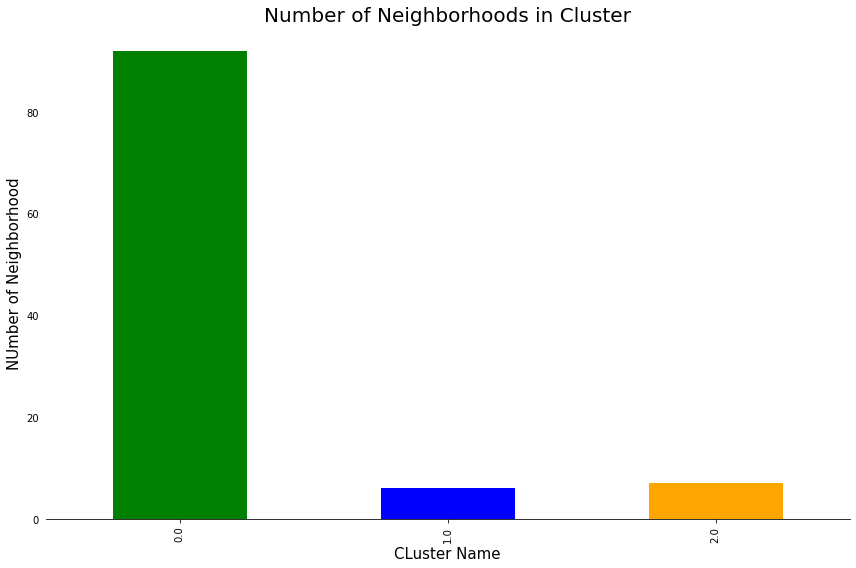

In [193]:
fig = plt.figure(figsize=(12,8))

ax = neigh_vs_label.plot(kind='bar', color=['green' ,'blue','orange'])
ax.set_title('Number of Neighborhoods in Cluster', fontsize=20)
ax.set_xlabel('CLuster Name', fontsize=15)
ax.set_ylabel('NUmber of Neighborhood', fontsize=15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(which='major', left=False)

fig.tight_layout()

## So, for opening a new gym , the best choosing place according to our analysis will be in CLuster--0 (red point in map)